# UKRAINE RUSSIA WAR SURVEY
 


The following topics are covered in this project:
1. Selecting and downloading a dataset
2. Data preparation and cleaning
3. Exploratory analysis and visualization
4. Asking and answering interesting questions
5. Summarizing inferences and drawing conclusions

## About Dataset

##### WAR, day 258

This is the dataset that describes Equipment Losses & Death Toll & Military Wounded & Prisoner of War of russians in 2022 Ukraine russia War.
All data are official and additionally structured by kaggle.
A lot of civilians and children have already been killed by russia troops. Ukraine is in war flame and under missile attack now. We are strong. Stand with Ukraine.

## Downloading the dataset
This data are downloading from :https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war?select=russia_losses_equipment.csv

Download the CSV manually and upload it.

It seems like the dataset contains two files:

* russia_losses_equipment.csv - The equipment losses of Russia
* russia_losses_personnel.csv - The personnel losses of Russia

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
data=pd.read_csv("C:\\Users\\kanika saini\\Downloads\\russia_losses_equipment.csv")

In [3]:
data.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


## Data Preparation and Cleaning
While the survey datset contain a wealth of information, we'll limit our analysis to the following areas:

* personnel loss of russia
* equipment loss of russia

View some basic information about the data frame.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       257 non-null    object 
 1   day                        257 non-null    int64  
 2   aircraft                   257 non-null    int64  
 3   helicopter                 257 non-null    int64  
 4   tank                       257 non-null    int64  
 5   APC                        257 non-null    int64  
 6   field artillery            257 non-null    int64  
 7   MRL                        257 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      257 non-null    int64  
 11  naval ship                 257 non-null    int64  
 12  anti-aircraft warfare      257 non-null    int64  
 13  special equipment          238 non-null    float64

Most columns have the data type `int`. It appears that some column contains  empty values since the Non-Null count for every column is lower than the total number of rows (257).

In [40]:
data.shape

(257, 18)

In [6]:
data1=data.drop(["mobile SRBM system","greatest losses direction","vehicles and fuel tanks","cruise missiles"],axis=1)

In [7]:
data1.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN


In [8]:
data1.shape

(257, 14)

Let's load the CSV files using the Pandas library using the name df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [9]:
df=pd.read_csv("C:\\Users\\kanika saini\\Downloads\\russia_losses_personnel.csv")
df.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        257 non-null    object 
 1   day         257 non-null    int64  
 2   personnel   257 non-null    int64  
 3   personnel*  257 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.2+ KB


Most columns have the data type int. It appears that some column contains  empty values since the Non-Null count for every column is lower than the total number of rows (257).

In [11]:
df1=df.drop(["personnel*"],axis=1)
df1.head()

,date,day,personnel,POW
0,2022-02-25,2,2800,0.0
1,2022-02-26,3,4300,0.0
2,2022-02-27,4,4500,0.0
3,2022-02-28,5,5300,0.0
4,2022-03-01,6,5710,200.0


- Merge the two data frame  `data1`and `df1`in one dataframe `russian_loss`.

In [12]:
russian_loss=pd.merge(data1,df1,on="date")
russian_loss.head()

,date,day_x,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,day_y,personnel,POW
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,2,2800,0.0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,3,4300,0.0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,4,4500,0.0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,5,5300,0.0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,6,5710,200.0


In [13]:
russian_loss["months"]=pd.DatetimeIndex(russian_loss["date"]).month

In [14]:
russian_loss.head()

,date,day_x,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,day_y,personnel,POW,months
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,2,2800,0.0,2
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,3,4300,0.0,2
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,4,4500,0.0,2
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,5,5300,0.0,2
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,6,5710,200.0,3


In [15]:
russian_loss.drop("day_y",axis=1, inplace=True)

In [16]:
russian_loss.fillna(0,inplace=True)
russian_loss.head()

,date,day_x,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,personnel,POW,months
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,0.0,2800,0.0,2
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,0.0,4300,0.0,2
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,0.0,4500,0.0,2
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,0.0,5300,0.0,2
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,0.0,5710,200.0,3


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the dataset'  i.e., aircraft,helicopter,personnel, drone,tank,fuel tank  etc. With the help of `matplotlib.pyplot` and `seaborn` python libraies.


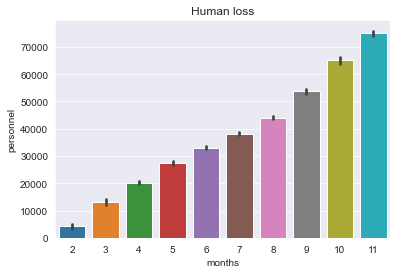

In [70]:
sns.barplot(x="months",y="personnel",data=russian_loss)
plt.title("Human loss");

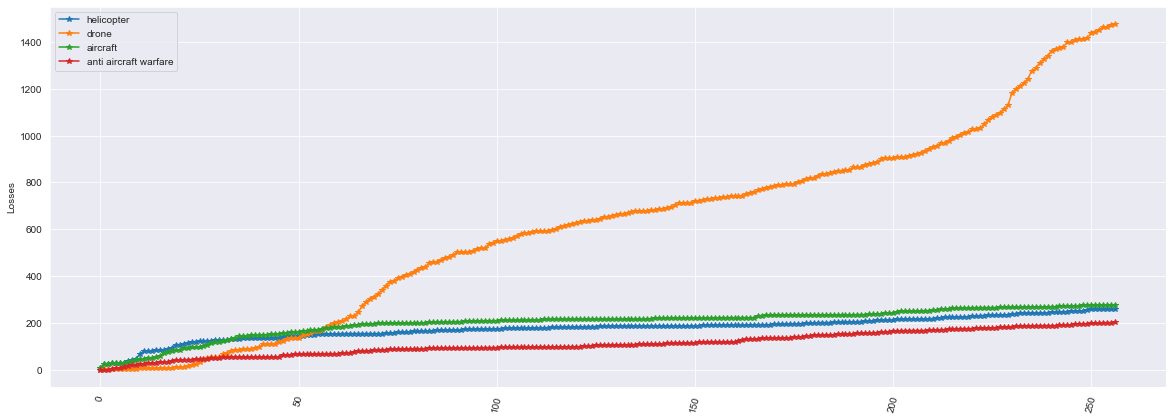

In [17]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=75)
plt.plot(russian_loss["helicopter"],marker="*",label="helicopter")
plt.plot(russian_loss["drone"],marker="*",label="drone")
plt.plot(russian_loss["aircraft"],marker="*",label="aircraft")
plt.plot(russian_loss["anti-aircraft warfare"],marker="*",label="anti aircraft warfare");
plt.ylabel("Losses");
plt.legend();

Russia has lost more equipments like aircraft, helicopter,anti aircraft warfare,drone,tank etc.In this visualization we can understand the equipment losses of Russia .Russia has lost above 1400 aircraft and starting days drone loss are minimum but drone losses are rapidly increase .

### Pie chart or equipment loss

In [18]:
selected_col=['helicopter','aircraft',"MRL",'naval ship','tank','fuel tank','anti-aircraft warfare','drone']
new_df=russian_loss[selected_col].sum()

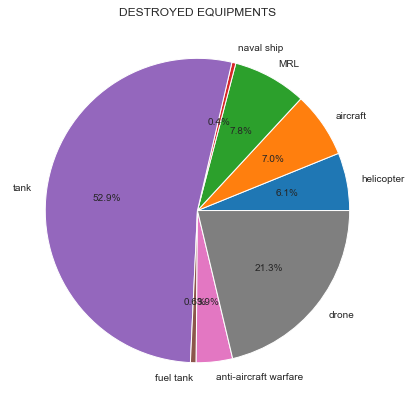

In [19]:
plt.figure(figsize=(7,7))
plt.title("DESTROYED EQUIPMENTS")
plt.pie(new_df,labels=new_df.index,autopct='%1.1f%%');

Russia has lost more equipments like aircraft, helicopter,anti aircraft warfare,drone,tank etc.In this Pie chart we can understand the  persentages of equipment losses of Russia .The losses of tanks are more than other equipments.

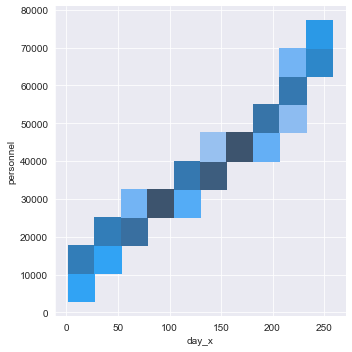

In [20]:
sns.displot(y=russian_loss["personnel"],x=russian_loss["day_x"]);

In the  visualization seem the personnel loss of Russia day wise .I have analysis the 258 day data of the Ukraine-Russia war.I analysis , Russia  personnels loss radio are rapidly increase.Russia has lost more the 70,000 personnels. 

### Minimum and maximum personnel loss  

In [21]:
x=df1.sort_values(by='personnel',ascending=False).head(10)
y=df1.sort_values(by='personnel').head(10)

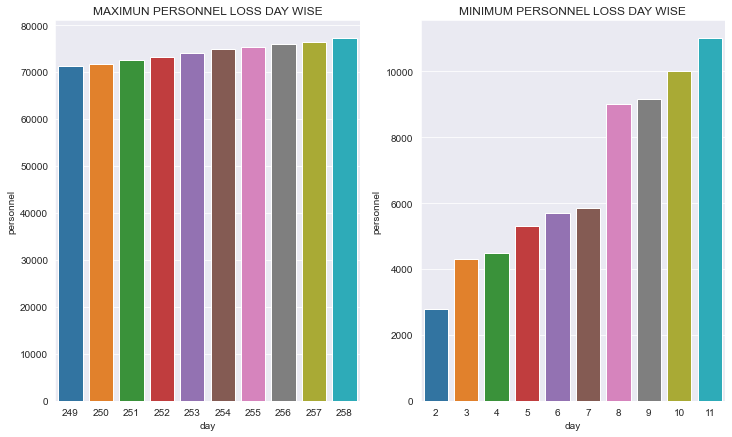

In [22]:
fig,axes=plt.subplots(1,2,figsize=(12,7))
sns.barplot(x="day",y="personnel",data=x,ax=axes[0])
axes[0].set_title("MAXIMUN PERSONNEL LOSS DAY WISE");
sns.barplot(x="day",y="personnel",data=y,ax=axes[1])
axes[1].set_title("MINIMUM PERSONNEL LOSS DAY WISE");

In the  visualization  the personnel losses of Russia day wise .I analysis , first day to 10 days Russia has lost the approx 10,000 personnels but the  death radio are rapidly increase.last 10 days Russia has lost the maximum personnels. 

## Asking and Answering Questions

I've already gained several insights about the dataset and  by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q1: How many russians died in the ukrian russia war ?


In [23]:
total_human_loss=df["personnel"].head()
total_human_loss

0    2800
1    4300
2    4500
3    5300
4    5710
Name: personnel, dtype: int64

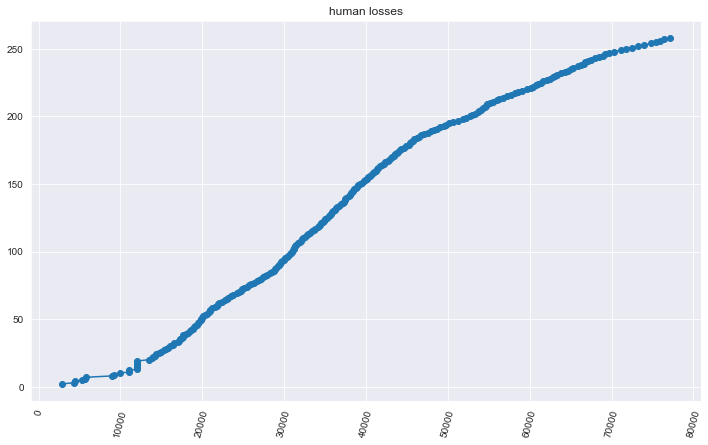

In [24]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=75)
plt.plot(russian_loss["personnel"],russian_loss["day_x"],marker="o",label="personnel")
plt.title("human losses");

### Q2: how many  aircraft did Russia lose?

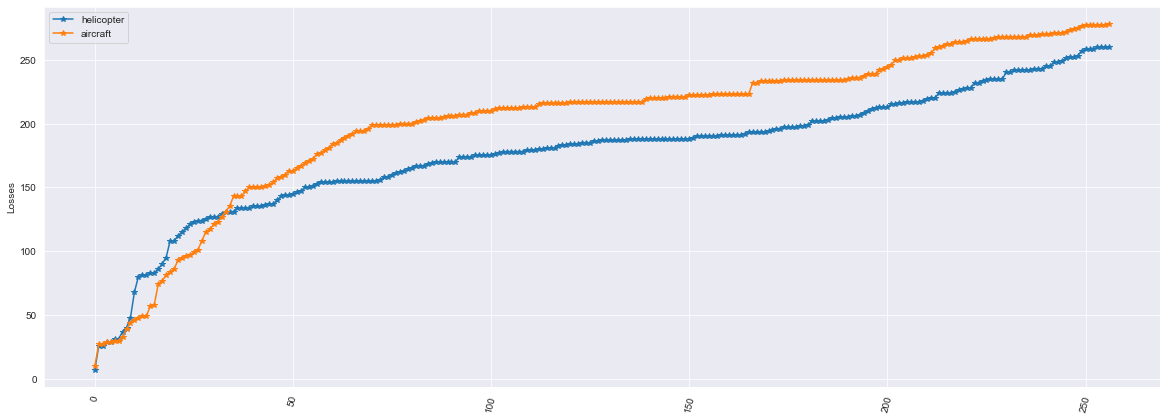

In [30]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=75)
plt.plot(russian_loss["helicopter"],marker="*",label="helicopter")
plt.plot(russian_loss["aircraft"],marker="*",label="aircraft")
plt.ylabel("Losses");
plt.legend();

### Q5:  ON WHICH DAYS DID  MINIMUM ANS MAXIMUM PERSONNEL LOSS HAPPEN ?

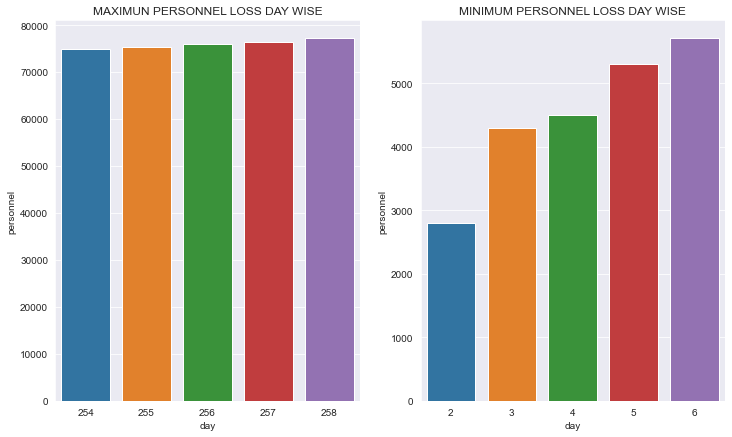

In [29]:
x=df.sort_values(by='personnel',ascending=False).head(5)
y=df.sort_values(by='personnel').head(5)
fig,axes=plt.subplots(1,2,figsize=(12,7))
sns.barplot(x="day",y="personnel",data=x,ax=axes[0])
axes[0].set_title("MAXIMUN PERSONNEL LOSS DAY WISE");
sns.barplot(x="day",y="personnel",data=y,ax=axes[1])
axes[1].set_title("MINIMUM PERSONNEL LOSS DAY WISE");

In the visualization the personnel losses of Russia day wise .I analysis , starting 5 days Russia has lost the approx 5,000 personnels but the death radio are rapidly increase.last 5 days Russia has lost more the 70,000 personnels.The death radio is rapidly increase .

### Q3: How many drone and naval ship did russia lose?

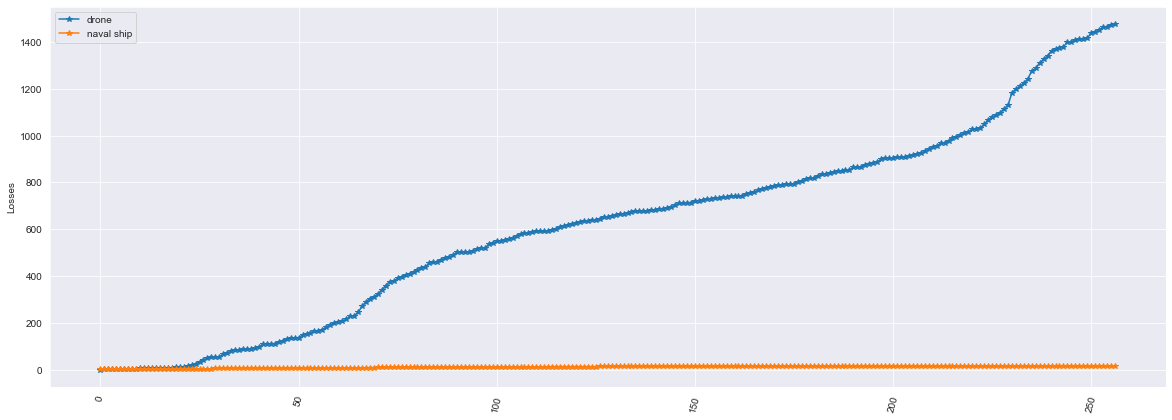

In [31]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=75)
plt.plot(russian_loss["drone"],marker="*",label="drone")
plt.plot(russian_loss["naval ship"],marker="*",label="naval ship")
plt.ylabel("Losses");
plt.legend();

### Q4: HOW MANY TANK AND FUEL TANK DID RUSSIA LOSE?

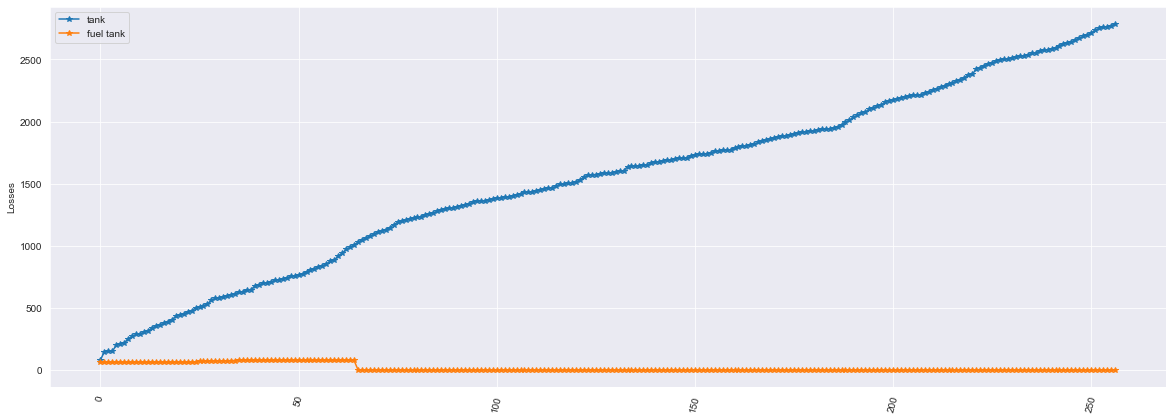

In [32]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=75)
plt.plot(russian_loss["tank"],marker="*",label="tank")
plt.plot(russian_loss["fuel tank"],marker="*",label="fuel tank")
plt.ylabel("Losses");
plt.legend();

## Inferences and Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey , I can infer that the survey is somewhat representative of the over all dataset. However, Russia has lost more equipments like aircraft,tank,fuel tank , drone ,naval ship etc.
 

- Only after some days of the war, Russia acknowledged that they have human losses. According to the dataset  the personnel loss of Russia above 70,000 .I analysis , starting 10 days of war Russia lost the approx 10,000 personnels but the death radio are rapidly increase.

- Russia has lost many  aircraft, helicopter.In this notebook we can understand the aircraft and helicopter losses of Russia every month.Russia lost above 250 aircraft and above 200 helicopter . 


- Russia has lost  many drone , naval ship in war. Russia has lost above 1400 drone . Starting days losses are minimum but the losses are increase rapidly in april month.

-  Russia has lost above 2500 tank .starting days tank losses are minimum but the losses are increase rapidly in april month. In the case of fuel tank loss minimum comparison to tank loss.

- Starting 5 days of war, Russia has lost the approx 5,000 personnels but the death radio are rapidly increase.last 5 days Russia has lost more the 70,000 personnels.The death radio is rapidly increase .


## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Ukriane-Russia War survey: 
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html